# Hotel Booking Stay in Week Night

In [39]:
#import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

## Data Extraction

In [40]:
housing = pd.read_csv('hotel_bookings.csv')

In [41]:
housing.shape

(119390, 32)

In [42]:
housing.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1                        0                     0       2  ...    No Deposit   
2                        0                     1       1  ...    No Deposit   
3                        0                     1       1  ...    No Deposit   
4                        0                     2       2  ...    No Deposit   

   agent company days_in_waiting_list customer_type   adr  \
0    NaN     NaN                    0     Transient   0.0   
1    NaN     NaN                    0     Transient   0.0   
2    NaN     NaN                    0     Transient  75.0   
3  304.0     NaN                    0     Transient  75.0   
4  240.0     NaN                    0     Transient  98.0   

   required_car_parking_spaces  total_of_special_requests  reservation_status  \
0                            0                          0           Check-Out   
1                            0                          0           Check-Out   
2                            0                          0           Check-Out   
3                            0                          0           Check-Out   
4                            0                          1           Check-Out   

  reservation_status_date  
0              2015-07-01  
1              2015-07-01  
2              2015-07-02  
3              2015-07-02  
4              2015-07-03  

[5 rows x 32 columns]

In [43]:
housing.describe()

is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000      119390.000000   
mean        0.370416     104.011416        2016.156554   
std         0.482918     106.863097           0.707476   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
std                   13.605138                   8.780829   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.000000                  23.000000   
max                   53.000000                  31.000000   

       stays_in_weekend_nights  stays_in_week_nights         adults  \
count            119390.000000         119390.000000  119390.000000   
mean                  0.927599              2.500302       1.856403   
std                   0.998613              1.908286       0.579261   
min                   0.000000              0.000000       0.000000   
25%                   0.000000              1.000000       2.000000   
50%                   1.000000              2.000000       2.000000   
75%                   2.000000              3.000000       2.000000   
max                  19.000000             50.000000      55.000000   

            children         babies  is_repeated_guest  \
count  119386.000000  119390.000000      119390.000000   
mean        0.103890       0.007949           0.031912   
std         0.398561       0.097436           0.175767   
min         0.000000       0.000000           0.000000   
25%         0.000000       0.000000           0.000000   
50%         0.000000       0.000000           0.000000   
75%         0.000000       0.000000           0.000000   
max        10.000000      10.000000           1.000000   

       previous_cancellations  previous_bookings_not_canceled  \
count           119390.000000                   119390.000000   
mean                 0.087118                        0.137097   
std                  0.844336                        1.497437   
min                  0.000000                        0.000000   
25%                  0.000000                        0.000000   
50%                  0.000000                        0.000000   
75%                  0.000000                        0.000000   
max                 26.000000                       72.000000   

       booking_changes          agent      company  days_in_waiting_list  \
count    119390.000000  103050.000000  6797.000000         119390.000000   
mean          0.221124      86.693382   189.266735              2.321149   
std           0.652306     110.774548   131.655015             17.594721   
min           0.000000       1.000000     6.000000              0.000000   
25%           0.000000       9.000000    62.000000              0.000000   
50%           0.000000      14.000000   179.000000              0.000000   
75%           0.000000     229.000000   270.000000              0.000000   
max          21.000000     535.000000   543.000000            391.000000   

                 adr  required_car_parking_spaces  total_of_special_requests  
count  119390.000000                119390.000000              119390.000000  
mean      101.831122                     0.062518                   0.571363  
std        50.535790                     0.245291                   0.792798  
min        -6.380000                     0.000000                   0.000000  
25%        69.290000                     0.000000                   0.000000  
50%        94.57500

In [44]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

## Cleaning Data

In [45]:
housing.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [46]:
housing.drop(['company'], axis=1)

hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   
2                    July                        27   
3                    July                        27   
4                    July                        27   
...                   ...                       ...   
119385             August                        35   
119386             August                        35   
119387             August                        35   
119388             August                        35   
119389             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
0                               1                        0   
1                               1                        0   
2                               1                        0   
3                               1                        0   
4                               1                        0   
...                           ...                      ...   
119385                         30                        2   
119386                         31                        2   
119387                         31                        2   
119388                         31                        2   
119389                         29                        2   

        stays_in_week_nights  adults  ...  booking_changes  deposit_type  \
0                          0       2  ...                3    No Deposit   
1                          0       2  ...                4    No Deposit   
2                          1       1  ...                0    No Deposit   
3                          1       1  ...                0    No Deposit   
4                          2       2  ...                0    No Deposit   
...                      ...     ...  ...              ...           ...   
119385                     5       2  ...                0    No Deposit   
119386                     5       3  ...                0    No Deposit   
119387                     5       2  ...                0    No Deposit   
119388                     5       2  ...                0    No Deposit   
119389                     7       2  ...                0    No Deposit   

        agent days_in_waiting_list customer_type     adr  \
0         NaN                    0     Transient    0.00   
1         NaN                    0     Transient    0.00   
2         NaN                    0     Transient   75.00   
3       304.0                    0     Transient   75.00   
4       240.0                    0     Transient   98.00   
...       ...                  ...           ...     ...   
119385  394.0                    0     Transient   96.14   
119386    9.0                    0     Transient  225.43   
119387    9.0                    0     Transient  157.71   
119388   89.0                    0     Transient  104.40   
119389    9.0                    0     Transient  151.20   

        required_car_parking_spaces  total_of_special_requests  \
0                                 0                          0   
1                                 0   

## Random Forest Model

In [47]:
#selection data
choice = housing[['stays_in_week_nights', 'adults', 'booking_changes', 'is_canceled']]
choice.head(40)

stays_in_week_nights  adults  booking_changes  is_canceled
0                      0       2                3            0
1                      0       2                4            0
2                      1       1                0            0
3                      1       1                0            0
4                      2       2                0            0
5                      2       2                0            0
6                      2       2                0            0
7                      2       2                0            0
8                      3       2                0            1
9                      3       2                0            1
10                     4       2                0            1
11                     4       2                0            0
12                     4       2                0            0
13                     4       2                1            0
14                     4       2                0            0
15                     4       2                0            0
16                     4       2                0            0
17                     1       2                0            0
18                     1       2                0            0
19                     4       2                0            0
20                     4       1                0            0
21                     4       2                1            0
22                     4       2                1            0
23                     4       2                1            0
24                     5       2                0            0
25                     5       2                0            0
26                     5       2                0            0
27                     5       2                0            1
28                     5       2                0            0
29                     5       2                0            0
30                    10       1                2            0
31                    11       2                0            0
32                     8       2                0            1
33                     4       2                0            0
34                     3       3                0            1
35                     3       3                0            1
36                     3       2                0            0
37                     3       3                0            0
38                     3       3                0            1
39                     3       2                0            0

In [48]:
candidates = {'stays_in_week_nights': [0,0,1,1,2,2,2,2,3,3,4,4,4,4,4,4,4,1,1,4,4,4,4,4,5,5,5,5,5,5,10,11,8,4,3,3,3,3,3,3],
              'adults': [2,2,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2,2,2,2,2,2,2,2,1,2,2,2,3,3,2,3,3,2],
              'booking_changes': [3,4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0],
              'is_canceled': [0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,1,0]}
df = pd.DataFrame(candidates, columns= ['stays_in_week_nights', 'adults', 'booking_changes', 'is_canceled'])
print(df)

    stays_in_week_nights  adults  booking_changes  is_canceled
0                      0       2                3            0
1                      0       2                4            0
2                      1       1                0            0
3                      1       1                0            0
4                      2       2                0            0
5                      2       2                0            0
6                      2       2                0            0
7                      2       2                0            0
8                      3       2                0            1
9                      3       2                0            1
10                     4       2                0            1
11                     4       2                0            0
12                     4       2                0            0
13                     4       2                1            0
14                     4       2                0      

In [49]:
X = df[['stays_in_week_nights', 'adults', 'booking_changes']]
y = df['is_canceled']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(30, 3)
(30,)
(10, 3)
(10,)


In [50]:
rf = RandomForestClassifier(n_estimators=100, max_depth=3)
rf.fit(X_train, y_train)
y_predict = rf.predict(X_test)
print(y_predict)

[0 0 0 0 0 0 0 0 0 0]


In [51]:
pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print(pred)
print(accuracy)

[0 0 0 0 0 0 0 0 0 0]
0.9


In [52]:
print(confusion_matrix(y_test, pred))

[[9 0]
 [1 0]]


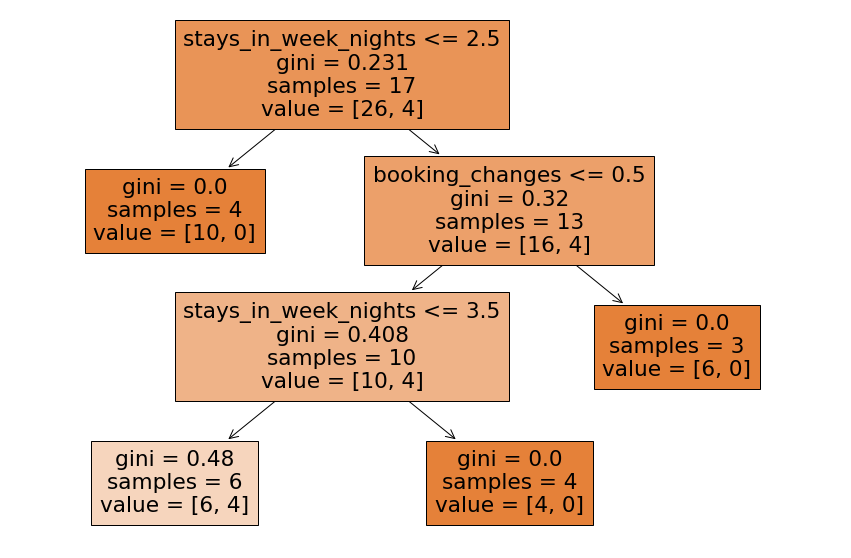

In [53]:
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=3, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
plt.figure(figsize=(15,10))
_ = tree.plot_tree(rf.estimators_[0], feature_names=X.columns, filled=True)

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

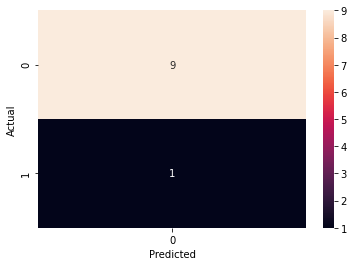

In [54]:
confusion_matrix = pd.crosstab(y_test, y_predict, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

## Visualization

array([[<AxesSubplot:title={'center':'is_canceled'}>,
        <AxesSubplot:title={'center':'lead_time'}>,
        <AxesSubplot:title={'center':'arrival_date_year'}>,
        <AxesSubplot:title={'center':'arrival_date_week_number'}>],
       [<AxesSubplot:title={'center':'arrival_date_day_of_month'}>,
        <AxesSubplot:title={'center':'stays_in_weekend_nights'}>,
        <AxesSubplot:title={'center':'stays_in_week_nights'}>,
        <AxesSubplot:title={'center':'adults'}>],
       [<AxesSubplot:title={'center':'children'}>,
        <AxesSubplot:title={'center':'babies'}>,
        <AxesSubplot:title={'center':'is_repeated_guest'}>,
        <AxesSubplot:title={'center':'previous_cancellations'}>],
       [<AxesSubplot:title={'center':'previous_bookings_not_canceled'}>,
        <AxesSubplot:title={'center':'booking_changes'}>,
        <AxesSubplot:title={'center':'agent'}>,
        <AxesSubplot:title={'center':'company'}>],
       [<AxesSubplot:title={'center':'days_in_waiting_list'}>,


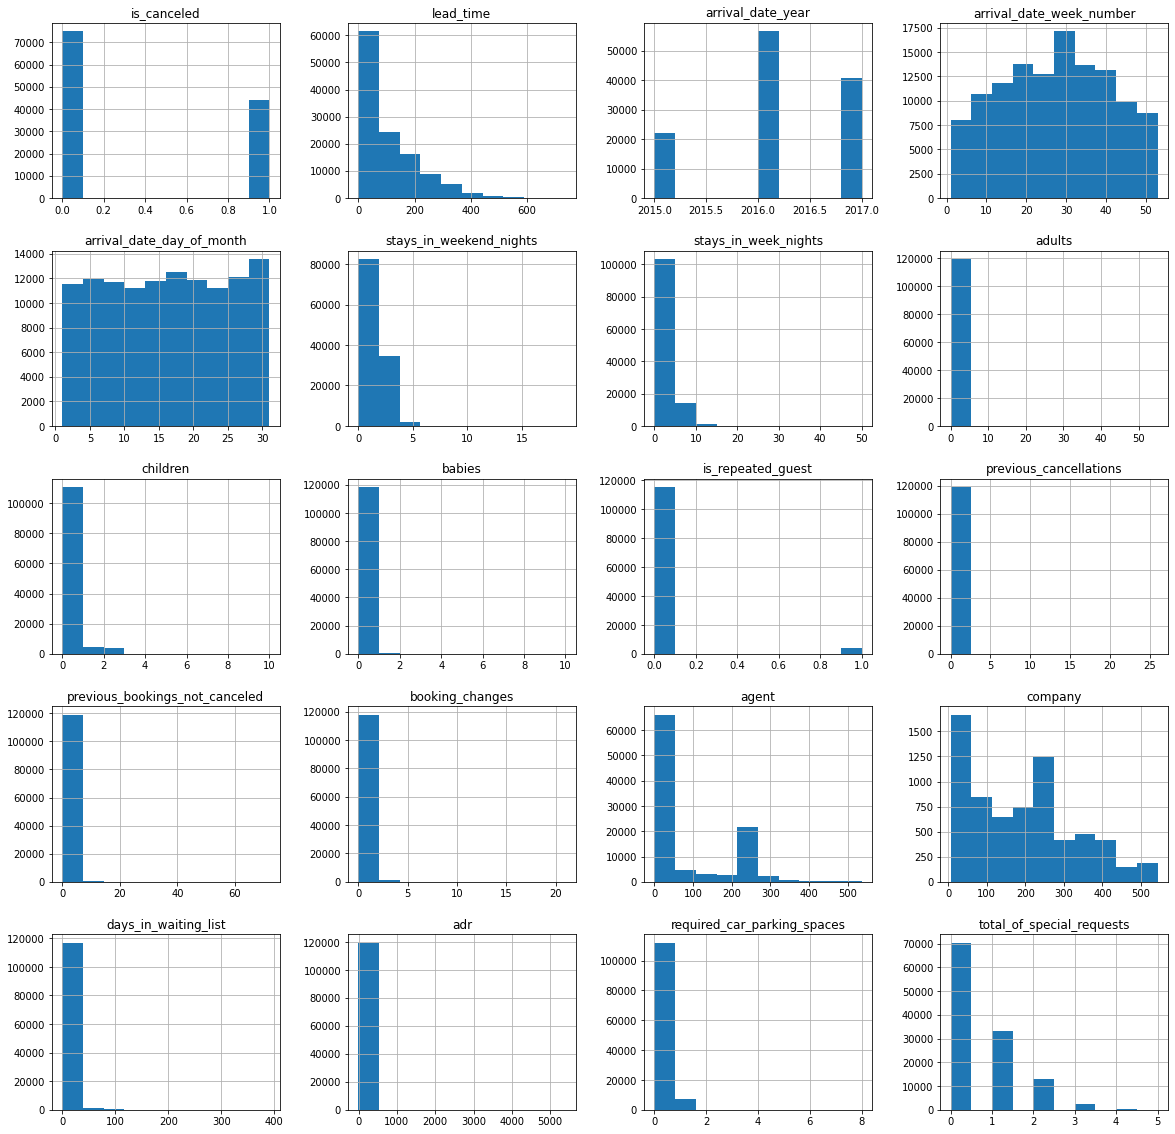

In [55]:
#histogram
housing.hist(figsize=(20,20))

<AxesSubplot:>

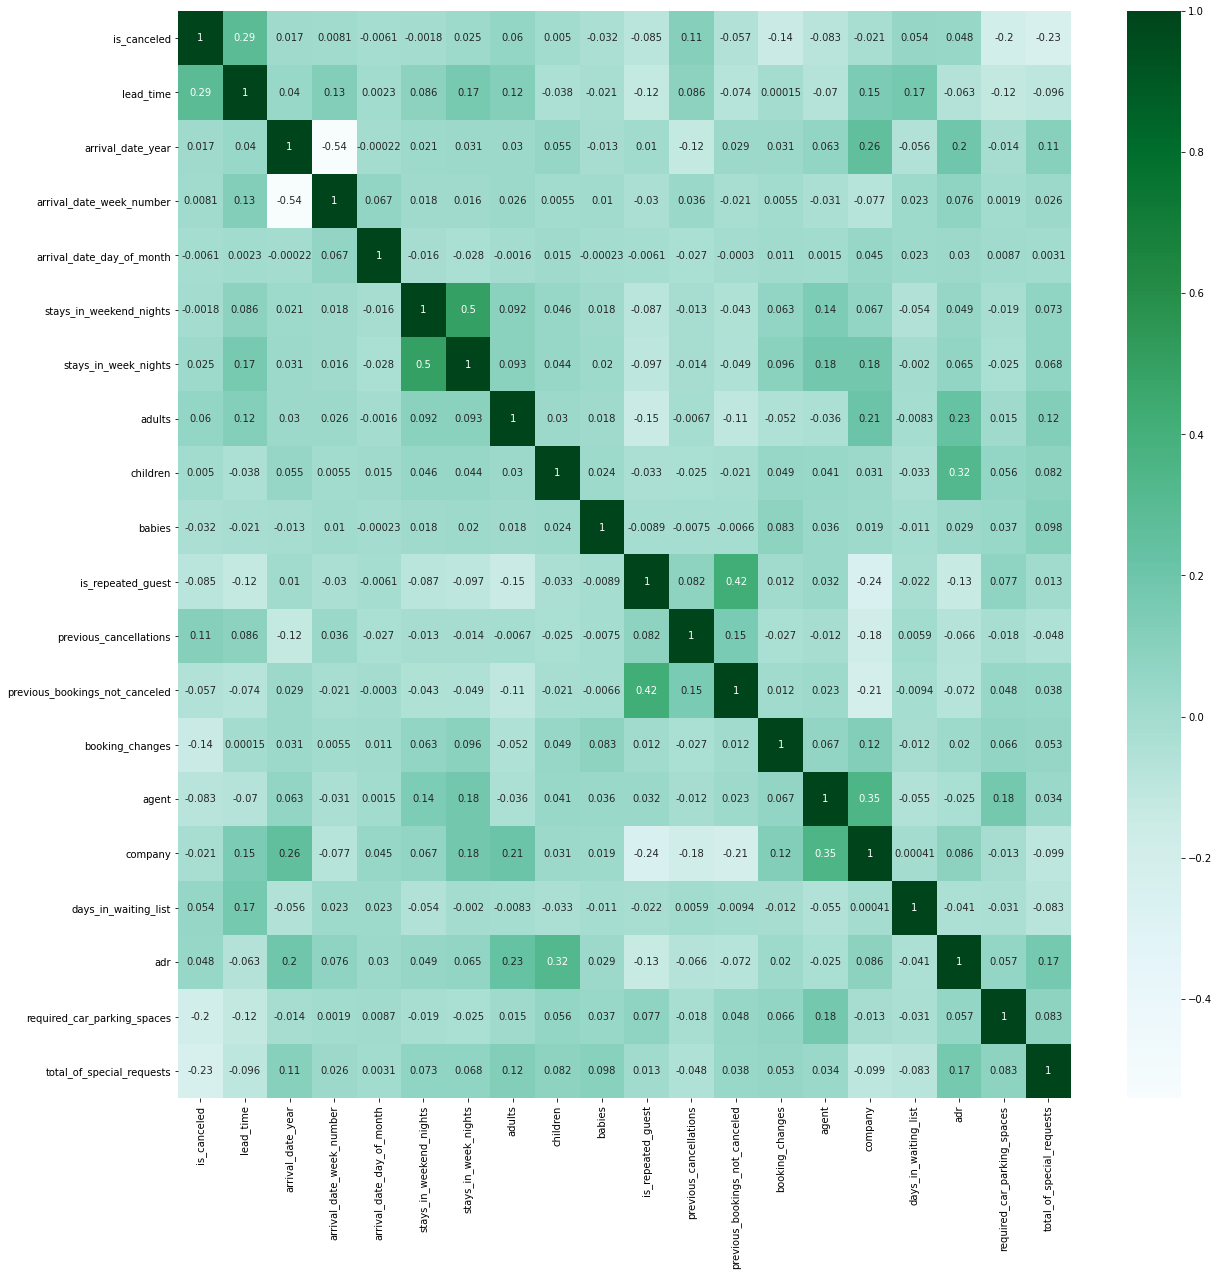

In [56]:
#heatmap correlation
plt.figure(figsize=(20,20))
sns.heatmap(housing.corr(), annot=True, cmap='BuGn')

c:\users\bayu\opencv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


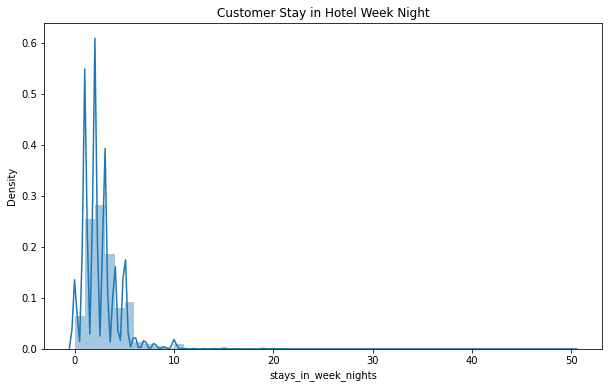

In [57]:
#distribution
plt.figure(figsize=(10,6))
sns.distplot(housing.stays_in_week_nights)
plt.title("Customer Stay in Hotel Week Night")
plt.show()

In [58]:
housing.hotel.value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

c:\users\bayu\opencv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


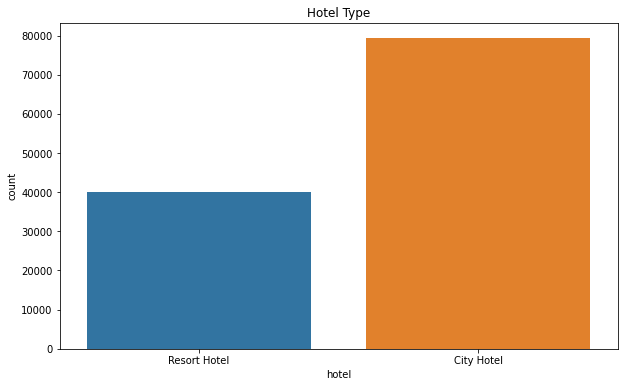

In [59]:
#print('countplot of hotel type')
plt.figure(figsize=(10,6))
sns.countplot(housing.hotel)
plt.title("Hotel Type")
plt.show()

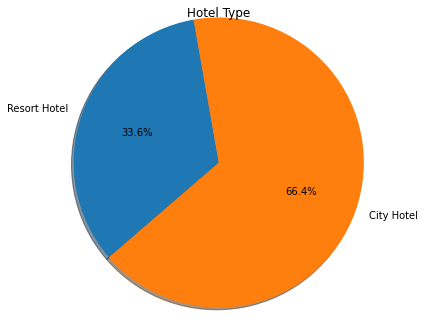

In [60]:
#print('pie chart of hotel type')\
plt.figure(figsize=(5,6))
hotel_type = [np.count_nonzero(housing['hotel'] == "Resort Hotel"),
              np.count_nonzero(housing['hotel'] == "City Hotel")]
activities = ['Resort Hotel', 'City Hotel']
plt.title("Hotel Type")
plt.pie(hotel_type, labels=activities, radius=1.3, startangle=100, autopct='%.1f%%', shadow=True)
plt.show()

In [61]:
housing.customer_type.value_counts()

Transient          89613
Transient-Party    25124
Contract            4076
Group                577
Name: customer_type, dtype: int64

c:\users\bayu\opencv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


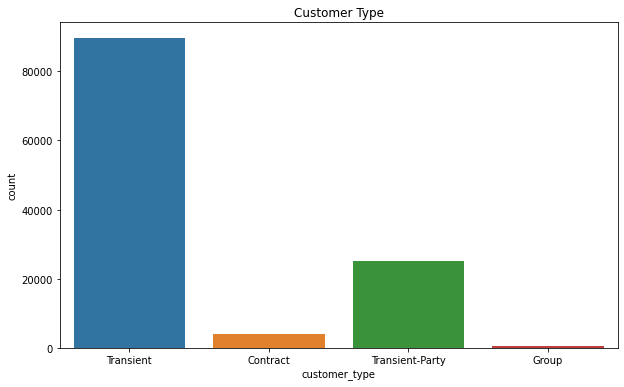

In [62]:
#print('countplot of customer type')
plt.figure(figsize=(10,6))
sns.countplot(housing.customer_type)
plt.title("Customer Type")
plt.show()

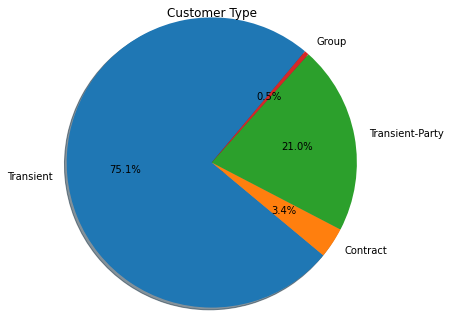

In [63]:
#print('pie chart of customer type')
plt.figure(figsize=(5,6))
customer = [np.count_nonzero(housing['customer_type'] == "Transient"),
           np.count_nonzero(housing['customer_type'] == "Contract"),
           np.count_nonzero(housing['customer_type'] == "Transient-Party"),
           np.count_nonzero(housing['customer_type'] == "Group")]
activities = ['Transient', 'Contract', 'Transient-Party', 'Group']
plt.title("Customer Type")
plt.pie(customer, labels=activities, radius=1.3, startangle=50, autopct='%.1f%%', shadow=True)
plt.show()

In [64]:
customer_hotel = housing.groupby(['customer_type', 'hotel']).size().reset_index(name = 'Count')
customer_hotel

customer_type         hotel  Count
0         Contract    City Hotel   2300
1         Contract  Resort Hotel   1776
2            Group    City Hotel    293
3            Group  Resort Hotel    284
4        Transient    City Hotel  59404
5        Transient  Resort Hotel  30209
6  Transient-Party    City Hotel  17333
7  Transient-Party  Resort Hotel   7791

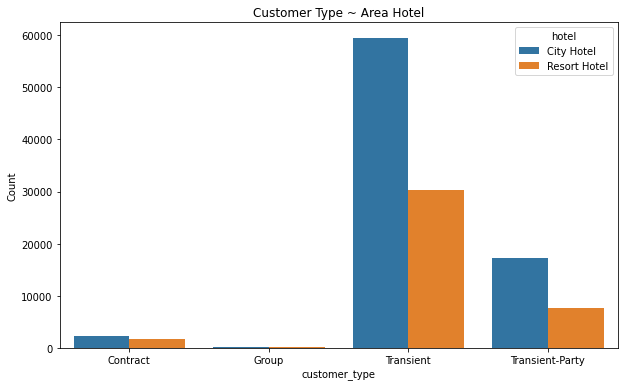

In [65]:
#print('barplot of comparison customer type & area of hotel')
plt.figure(figsize=(10,6))
sns.barplot(x='customer_type', y='Count', hue='hotel', data=customer_hotel)
plt.title("Customer Type ~ Area Hotel")
plt.show()

<AxesSubplot:xlabel='stays_in_week_nights', ylabel='booking_changes'>

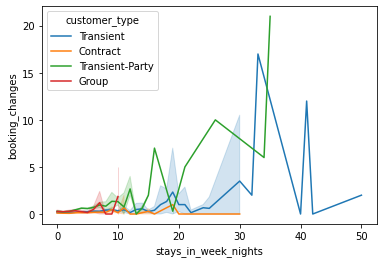

In [66]:
#print('line plot of customer type stay in week night')
sns.lineplot(data=housing, x='stays_in_week_nights', y='booking_changes', hue='customer_type')

<AxesSubplot:xlabel='arrival_date_week_number', ylabel='Density'>

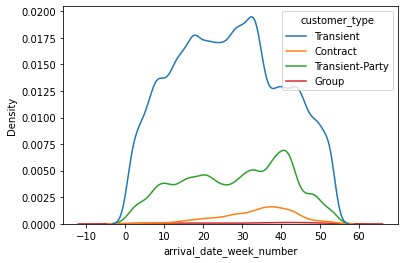

In [67]:
#print('kde plot of density arrival date number of customer stay in hotel')
sns.kdeplot(data=housing, x='arrival_date_week_number', hue='customer_type')